In [22]:
import random
from numpy import cos, sin, pi, absolute, arange, linspace
from scipy.signal import kaiserord, lfilter, firwin, freqz, kaiser_beta
from matplotlib.pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, rcParams, scatter


sample_rate = 18000.0
nsamples = 100
#t = arange(nsamples) / sample_rate
#x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)
t = linspace(-5.*pi,5.*pi,300);
# x = sin(10*t)+sin(4*t)+cos(7*t)+sin(t);
# x= sin(10*linspace(-5.*pi,5.*pi,300))
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)

nyq_rate = sample_rate / 2.0
width = 360000.0/nyq_rate
beta = kaiser_beta(40)
passband= [0.44, 0.66]
N= 11
taps = firwin(N, passband, window=('kaiser', beta), pass_zero=False)
filtered_x = lfilter(taps, 1.0, x)

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [7]:
N

11

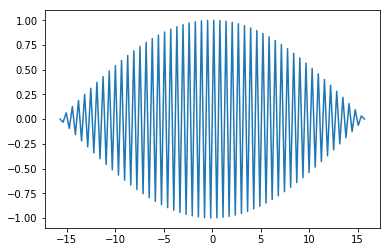

In [9]:
# scatter(linspace(-5.*pi,5.*pi,100),sin(10*linspace(-5.*pi,5.*pi,100)))
plot(linspace(-5.*pi,5.*pi,100),sin(10*linspace(-5.*pi,5.*pi,100)))
show()

In [23]:
from scipy.signal import kaiser_beta
kaiser_beta(40)

3.3953210522614574

C:\Users\KIIT\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


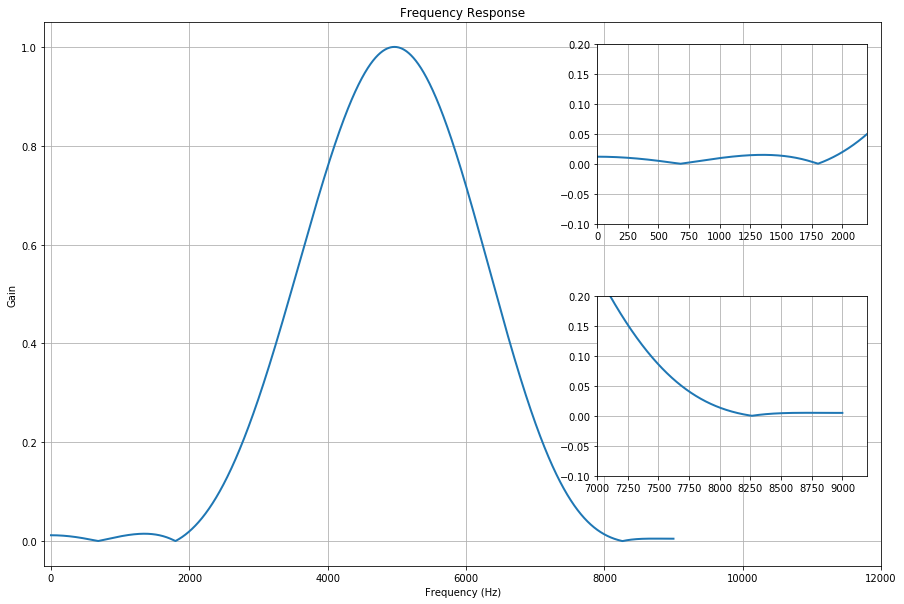

In [24]:
from numpy import array
rcParams['figure.figsize']= 15, 10
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
# ylim(-0.05, 1.05)
xlim(-100,12000)
grid(True)

ax1 = axes([0.637, 0.6, .25, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,2200)
ylim(-0.1,0.2)
grid(True)

ax2 = axes([0.637, 0.25, .25, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(7000, 9200)
ylim(-0.1,0.2)
grid(True)
show()

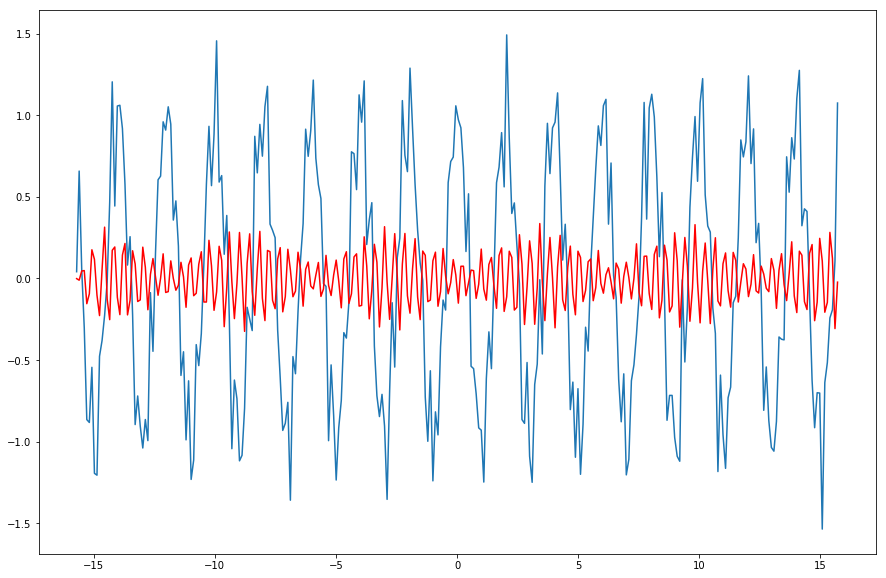

In [25]:
rcParams['figure.figsize']= 15, 10
plot(t,x)
# scatter(t,x, color='blue')
plot(t,filtered_x, color='red')
# scatter(t, filtered_x, color='black')
show()

In [26]:
w

array([0.00000000e+00, 3.92699082e-04, 7.85398163e-04, ...,
       3.14041456e+00, 3.14080726e+00, 3.14119995e+00])